In [1]:
#实验1.1 梯度下降法求y=(x-2.5)*(x-2.5)-1的极值点
#前面写了一个函数版本的
#后面还写了一个class版本的

In [2]:
#1.绘制图像

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mindspore

plot_x=mindspore.numpy.linspace(-1.,6.,14).asnumpy()
plot_y=(plot_x-2.5)**2-1

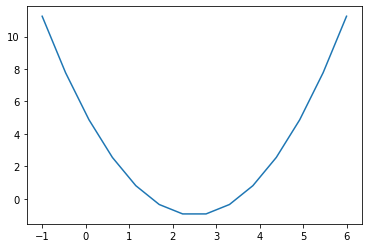

In [4]:
plt.plot(plot_x,plot_y)

In [5]:
#2.根据损失函数及其导数，将梯度下降封装成函数

In [6]:
epsilon=1e-8#阈值
eta=0.1#步长

In [7]:
#函数值
def J(theta):
    return (theta-2.5)**2-1

In [8]:
#求导数
def dJ(theta):
    return 2*(theta-2.5)

In [9]:
theta_history=[]
def gradient_descent(initial_theta,eta,epsilon=1e-8):
    theta=initial_theta#初始点
    theta_history.append(initial_theta)
    while True:
        gradient=dJ(theta)#求导
        last_theta=theta
        theta=theta-eta*gradient
        theta_history.append(theta)#保存梯度下降计算后的参数值
        
        if(abs(J(theta)-J(last_theta))<epsilon):#小于阈值，找到最优解
            break
    return 

In [10]:
#3.封装梯度下降过程
def plot_theta_history():
    plt.plot(plot_x,plot_y)
    plt.plot(np.array(theta_history),J(np.array(theta_history)))

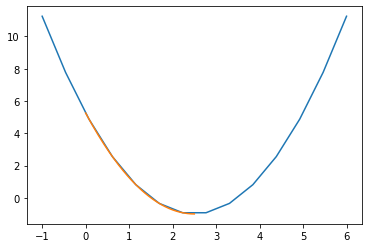

In [11]:
eta=0.01
theta_history=[]
gradient_descent(0,eta)
plot_theta_history()

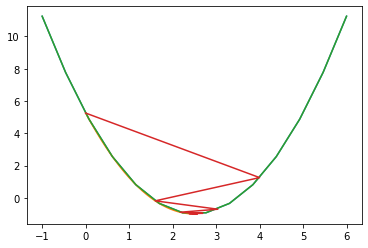

In [12]:
#4.学习率影响梯度下降总时间
#减小学习率
eta=0.001
theta_history=[]
gradient_descent(0,eta)
plot_theta_history()
#增大学习率
eta=0.8
theta_history=[]
gradient_descent(0,eta)
plot_theta_history()

In [13]:
#5.学习率过大时报错，1.修改自定义目标函数,2.在自定义梯度下降函数中增加迭代次数作为超参数
def J(theta):
    try:
        return (theta-2.5)**2-1
    except:
        return float('inf')
def gradient_descent(initial_theta,eta,epsilon=1e-8,n_iters=1e4):
    theta=initial_theta#初始点
    theta_history.append(initial_theta)
    i_iter=0
    while i_iter<n_iters:
        gradient=dJ(theta)#求导
        last_theta=theta
        theta=theta-eta-gradient
        theta_history.append(theta)#保存梯度下降计算后的参数值
        
        if(abs(J(theta)-J(last_theta))<epsilon):#小于阈值，找到最优解
            break
        i_iter+=1

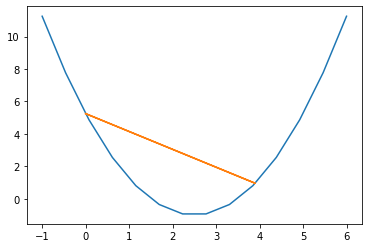

In [14]:
eta=1.1
theta_history=[]
gradient_descent(0,eta)
plot_theta_history()

In [15]:
#实验1.1结束

In [16]:
#实验1.1____class版本

In [17]:
import numpy as np
import matplotlib.pyplot as plt

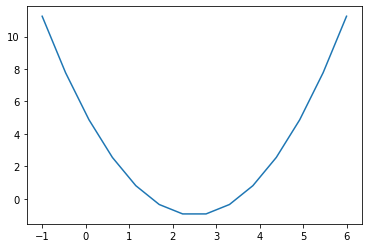

In [18]:
plot_x=np.linspace(-1.,6.,14)
plot_y=(plot_x-2.5)**2-1
plt.plot(plot_x,plot_y)

In [19]:
class gradient_descent():
    def __init__(self,eta,x,y,epsilon=1e-8):
        """
        eta:学习率
        x x
        y y
        epsilon:阈值
        """
        self.eta=eta
        self.x=x
        self.y=y
        self.epsilon=epsilon
        self.theta_history=[]

    def J(self,theta):
        """
        函数值
        """
        return (theta - 2.5) ** 2 - 1

    def dJ(self,theta):
        """
        求导
        """
        return 2*(theta-2.5)

    def plot_theta_history(self):

        plt.plot(self.x, self.y)
        plt.plot(np.array(self.theta_history), self.J(np.array(self.theta_history)))

    def gradient_descent(self,initial_theta,epsilon=1e-8):
        self.epsilon=epsilon   # 阈值
        theta = initial_theta  # 初始点

        self.theta_history=[]
        self.theta_history.append(initial_theta)

        while True:
            gradient = self.dJ(theta)  # 求导
            last_theta = theta
            theta = theta - self.eta * gradient
            self.theta_history.append(theta)  # 保存梯度下降计算后的参数值

            if (abs(self.J(theta) - self.J(last_theta)) < epsilon):  # 小于阈值，找到最优解
                break
        return 1
    

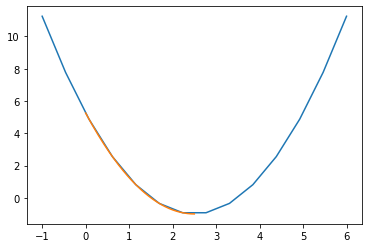

In [20]:
gd=gradient_descent(0.01,plot_x,plot_y)
gd.gradient_descent(0)
gd.plot_theta_history()